In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
import os
from sklearn import tree


# Absenteeism at work

Dataset URL: https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work

It contains the records of absenteeism at work from 36 different employees in the dates July 2007 to July 2010 at a courier company in Brazil

**Goal**. Forecast if a employee is going to be absent the whole day. Also obtain the most important features in job absenteeism.

**Assumptions**. Daily work loads of 8 hours. 

In [2]:
df = pd.read_csv('Absenteeism_at_work.csv', sep = ';')

# Exploratory Data Analysis  (EDA)

In [3]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [4]:
df.shape

(740, 21)

In [5]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [6]:
df['ID'].nunique()

36

740 records with 21 features and 1 label.
From 36 employees.

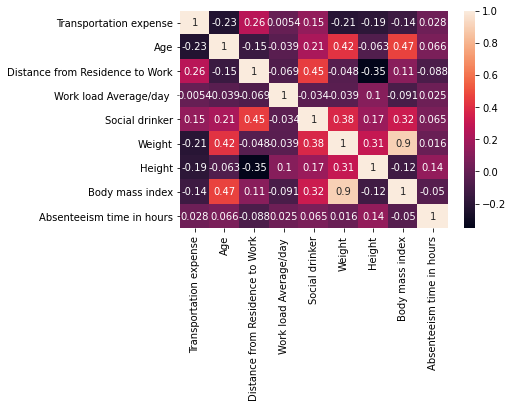

In [7]:
sns.heatmap(df[['Transportation expense','Age','Distance from Residence to Work','Work load Average/day ',
               'Social drinker','Weight','Height','Body mass index','Absenteeism time in hours']].corr(), annot = True)

## Knowing the data

The dataset it contains information about only for one company. To know better our data let's get some basic statistics such as the average age of the employee, how many are social smokers or what's the average weight

In [8]:
df['Reason for absence'] = df['Reason for absence'].astype(str)
f = {'Reason for absence':[ ' '.join, 'count'],
    'Transportation expense': 'max',
    'Age':'max',
    'Distance from Residence to Work':'mean',
    'Work load Average/day ': 'mean',
    'Hit target':'mean',
    'Disciplinary failure':'mean',
    'Education':'max',
    'Son':'max',
    'Social drinker':'mean',
    'Social smoker':'mean',
    'Pet':'max',
    'Weight': 'mean',
    'Height':'mean',
    'Body mass index': 'mean',
    'Absenteeism time in hours': 'mean'
    }
# Getting some individual statistics
df_grouped = df.groupby('ID').agg(f)
df_grouped.columns = df_grouped.columns.droplevel(1)
df_grouped.head()

,Reason for absence,Reason for absence,Transportation expense,Age,Distance from Residence to Work,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,,,,,,,,,,,,,,,,,
1,22 23 26 7 13 23 19 26 18 25 23 25 14 13 22 21...,23,235,37,11.0,262.894478,95.173913,0.043478,3,1,0.0,0,1,88,172.0,29.0,5.260870
2,18 18 28 0 23 0,6,235,48,29.0,241.597000,93.333333,0.333333,1,1,0.0,1,5,88,163.0,33.0,4.166667
3,23 23 11 23 23 21 11 23 18 23 23 23 23 23 23 2...,113,179,38,51.0,262.175062,95.070796,0.008850,1,0,1.0,0,0,89,170.0,31.0,4.265487
4,0,1,118,40,14.0,271.219000,95.000000,0.000000,1,1,1.0,0,8,98,170.0,34.0,0.000000
5,19 0 26 0 0 0 23 23 26 13 26 13 26 26 26 0 26 ...,19,235,43,20.0,266.650632,91.526316,0.263158,1,1,1.0,0,0,106,167.0,38.0,5.473684


In [9]:
df_grouped.describe()

,Reason for absence,Transportation expense,Age,Distance from Residence to Work,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,20.555556,237.277778,38.333333,27.255556,272.596560,94.481729,0.108290,1.361111,1.138889,0.522222,0.194444,1.277778,78.805556,172.983333,26.394444,6.814286
std,23.695020,73.982087,7.917431,14.472327,19.326146,1.929235,0.144789,0.761682,1.018480,0.502059,0.401386,2.092314,13.458549,6.238017,4.692970,5.813239
min,1.000000,118.000000,27.000000,5.000000,241.597000,88.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,5.000000,179.000000,32.000000,15.000000,262.031146,93.845833,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,68.000000,169.000000,23.000000,4.200000
50%,9.000000,235.000000,37.500000,25.500000,270.885009,94.904891,0.037500,1.000000,1.000000,0.900000,0.000000,0.000000,76.500000,172.000000,25.000000,5.333333
75%,29.250000,289.000000,43.000000,37.500000,281.306250,95.622414,0.182353,1.000000,2.000000,1.000000,0.000000,2.000000,88.250000,175.750000,29.250000,7.812500
max,113.000000,388.000000,58.000000,52.000000,328.018000,97.500000,0.500000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,32.750000


###  Body mass index distribution

How healthy the employees are?

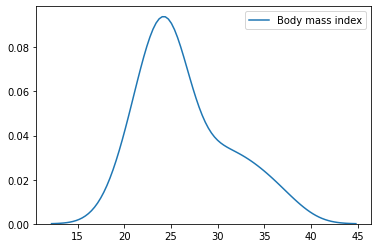

In [10]:
sns.kdeplot(df_grouped['Body mass index'])

### Work load distribution

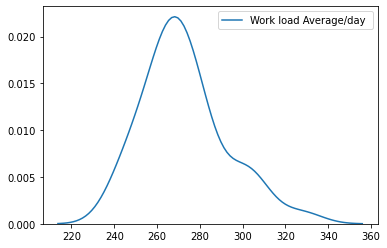

In [11]:
sns.kdeplot(df_grouped['Work load Average/day '])

### Absenteeism distribution

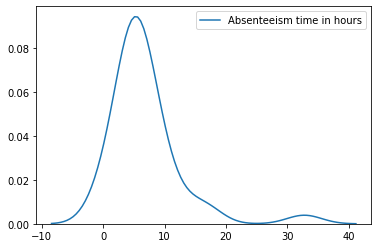

In [12]:
sns.kdeplot(df_grouped['Absenteeism time in hours'])

## Splitting the data

I'm interested in the ones that missed the whole day.

In [13]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [14]:
df['absent'] = np.where (df['Absenteeism time in hours'] >= 8, 1, 0)
df = df.drop(columns = 'Absenteeism time in hours')
df = df.set_index('ID')
df.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,absent
ID,,,,,,,,,,,,,,,,,,,,
11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,0
36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,0
7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,0
11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,0


0    469
1    271
Name: absent, dtype: int64

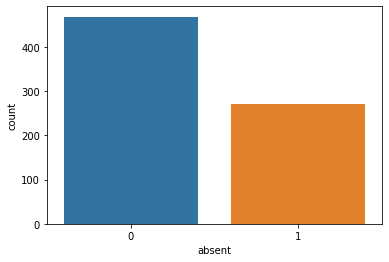

In [15]:
sns.countplot(df['absent'],label="Count")
df['absent'].value_counts()

The majority didn't miss the whole day. Around 60%. 

## Modeling

I'm using 75% of the dataset to train the model set and the rest to testing it. 

In [16]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify = y)

# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 0, class_weight={0:1,1:2})
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 2},
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [17]:
X

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
ID,,,,,,,,,,,,,,,,,,
11,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30
36,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31
3,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31
7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24
11,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30
1,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29
4,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34


## Evaluation

In [18]:
# Predicting the Test set results
y_prob = classifier.predict_proba(X_test)[:,1]
y_pred = classifier.predict(X_test)

In [19]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print (accuracy_score(y_test, y_pred))

[[90 27]
 [36 32]]
0.6594594594594595


In [20]:
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.71      0.77      0.74       117
           1       0.54      0.47      0.50        68

    accuracy                           0.66       185
   macro avg       0.63      0.62      0.62       185
weighted avg       0.65      0.66      0.65       185



### Feature Importance

In [42]:
indices

array([ 1,  8,  7,  0,  2,  3,  6,  5,  9, 15, 11, 16,  4, 14, 17, 10, 13,
       12])

In [45]:
std

array([0.02471976, 0.02570822, 0.01660338, 0.05125099, 0.01504926,
       0.03004503, 0.02760243, 0.0329729 , 0.04681651, 0.01186402,
       0.00583246, 0.00938799, 0.00339655, 0.00868261, 0.00803449,
       0.00791505, 0.02237954, 0.01211811])

In [47]:
 X.columns

Index(['Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index'],
      dtype='object')

Feature ranking:
1. Month of absence (0.185131)
2. Day of the week (0.151882)
3. Seasons (0.145348)
4. Transportation expense (0.107612)
5. Distance from Residence to Work (0.066017)
6. Service time (0.064002)
7. Age (0.056648)
8. Work load Average/day  (0.029964)
9. Hit target (0.029577)
10. Disciplinary failure (0.026817)
11. Education (0.026728)
12. Son (0.026259)
13. Social drinker (0.021022)
14. Social smoker (0.021013)
15. Pet (0.017141)
16. Weight (0.010534)
17. Height (0.008374)
18. Body mass index (0.005931)


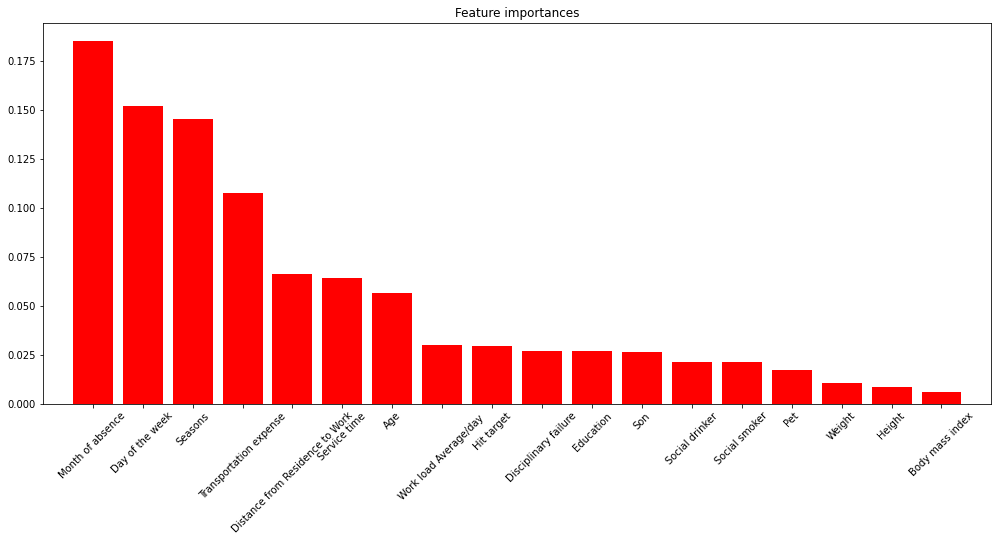

In [54]:

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(17,7))
plt.title("Feature importances")
plt.bar(X.columns, importances[indices],
        color="r", align="center")
plt.xticks(rotation=45)
#plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## sdfsdfsd


In [55]:
classifier.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=209652396, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=398764591, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth

In [56]:

i_tree = 0

for tree_in_forest in classifier.estimators_:
    if (i_tree <1):  
        print (i_tree)
        export_graphviz(tree_in_forest,
                feature_names=X.columns,
                filled=True,
                rounded=True)
        i_tree = i_tree + 1
os.system('dot -Tpng tree.dot -o tree.png')



0


32512

In [57]:
export_graphviz(tree_in_forest,
                feature_names=X.columns,
                filled=True,
                rounded=True)

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label="Transportation expense <= 226.5\\nentropy = 0.995\\nsamples = 367\\nvalue = [348, 414]", fillcolor="#dfeffb"] ;\n1 [label="Work load Average/day  <= 267.067\\nentropy = 0.963\\nsamples = 200\\nvalue = [221, 140]", fillcolor="#f5d1b6"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Age <= 40.5\\nentropy = 0.877\\nsamples = 107\\nvalue = [133, 56]", fillcolor="#f0b68c"] ;\n1 -> 2 ;\n3 [label="Son <= 1.5\\nentropy = 0.91\\nsamples = 95\\nvalue = [116, 56]", fillcolor="#f2be99"] ;\n2 -> 3 ;\n4 [label="Education <= 2.0\\nentropy = 0.8\\nsamples = 85\\nvalue = [112, 36]", fillcolor="#edaa79"] ;\n3 -> 4 ;\n5 [label="Day of the week <= 2.5\\nentropy = 0.857\\nsamples = 70\\nvalue = [92, 36]", fillcolor="#efb286"] ;\n4 -> 5 ;\n6 [label="Work load Average/day  <= 245.337\\nentropy = 0.555\\nsamples = 18\\nvalue = [27, 4]", fillcolor=